## Comparación INEGI 2019-2022

En este notebook se comparan los datasets de INEGI del 2019 y del 2022 para ver las diferencias.

In [2]:
import pandas as pd

### Leyendo los datasets

In [3]:
inegi_2019 = pd.read_csv('../../data/inegi_2019.csv')
inegi_2022 = pd.read_csv('../../data/inegi_2022.csv')

In [5]:
print("filas y columnas de INEGI 2019: ", inegi_2019.shape)
print("filas y columnas de INEGI 2022: ", inegi_2022.shape)

filas y columnas de INEGI 2019:  (299570, 20)
filas y columnas de INEGI 2022:  (300240, 20)


In [6]:
inegi_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299570 entries, 0 to 299569
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   MAPA                          299570 non-null  int64  
 1   Estatus                       10438 non-null   object 
 2   CVE_ENT                       299570 non-null  int64  
 3   NOM_ENT                       299570 non-null  object 
 4   NOM_ABR                       299570 non-null  object 
 5   CVE_MUN                       299570 non-null  int64  
 6   NOM_MUN                       299570 non-null  object 
 7   CVE_LOC                       299570 non-null  int64  
 8   NOM_LOC                       299570 non-null  object 
 9   AMBITO                        299570 non-null  object 
 10  LATITUD                       299570 non-null  object 
 11  LONGITUD                      299570 non-null  object 
 12  LAT_DECIMAL                   299570 non-nul

In [7]:
inegi_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300240 entries, 0 to 300239
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   MAPA                          300240 non-null  int64  
 1   Estatus                       4471 non-null    object 
 2   CVE_ENT                       300240 non-null  int64  
 3   NOM_ENT                       300240 non-null  object 
 4   NOM_ABR                       300240 non-null  object 
 5   CVE_MUN                       300240 non-null  int64  
 6   NOM_MUN                       300240 non-null  object 
 7   CVE_LOC                       300240 non-null  int64  
 8   NOM_LOC                       300240 non-null  object 
 9   AMBITO                        300240 non-null  object 
 10  LATITUD                       300240 non-null  object 
 11  LONGITUD                      300240 non-null  object 
 12  LAT_DECIMAL                   300240 non-nul

### Creando una clave única con entidad, municipio y localidad

In [9]:
# Crear la clave única en inegi_2019
inegi_2019['clave_unica'] = inegi_2019['NOM_ENT'] + '_' + inegi_2019['NOM_MUN'] + '_' + inegi_2019['NOM_LOC']

# Crear la clave única en inegi_2022
inegi_2022['clave_unica'] = inegi_2022['NOM_ENT'] + '_' + inegi_2022['NOM_MUN'] + '_' + inegi_2022['NOM_LOC']

### Identificando las claves únicas (localidades) que están en INEGI 2022 pero no en INEGI 2019

In [10]:
# Identificar claves únicas presentes en inegi_2022 pero no en inegi_2019
claves_nuevas = inegi_2022[~inegi_2022['clave_unica'].isin(inegi_2019['clave_unica'])]['clave_unica']

# Filtrar las filas de inegi_2022 que corresponden a estas claves únicas nuevas
resultado = inegi_2022[inegi_2022['clave_unica'].isin(claves_nuevas)]

In [14]:
resultado.shape

(6802, 21)

In [15]:
resultado

,MAPA,Estatus,CVE_ENT,NOM_ENT,NOM_ABR,CVE_MUN,NOM_MUN,CVE_LOC,NOM_LOC,AMBITO,...,LONGITUD,LAT_DECIMAL,LON_DECIMAL,ALTITUD,CVE_CARTA,POB_TOTAL,POB_MASCULINA,POB_FEMENINA,TOTAL DE VIVIENDAS HABITADAS,clave_unica
211,10010912,NaN,1,Aguascalientes,Ags.,1,Aguascalientes,912,Dr. Gustavo León Mojica García [Hospital Psiqu...,R,...,"102°21´20.763W""",21.839092,-102.355768,1860,F13D18,15,*,*,1,Aguascalientes_Aguascalientes_Dr. Gustavo León...
586,10012347,NaN,1,Aguascalientes,Ags.,1,Aguascalientes,2347,La Chorrera,R,...,"102°07´32.647W""",21.995356,-102.125735,1969,F13D19,6,*,*,1,Aguascalientes_Aguascalientes_La Chorrera
587,10012348,NaN,1,Aguascalientes,Ags.,1,Aguascalientes,2348,El Rebrote,R,...,"102°20´32.474W""",21.679289,-102.342354,1845,F13D28,6,*,*,2,Aguascalientes_Aguascalientes_El Rebrote
713,10012502,NaN,1,Aguascalientes,Ags.,1,Aguascalientes,2502,Don Gabriel,R,...,"102°07´05.799W""",22.043482,-102.118277,1941,F13B89,-,-,-,-,Aguascalientes_Aguascalientes_Don Gabriel
714,10012503,NaN,1,Aguascalientes,Ags.,1,Aguascalientes,2503,Jorge Jiménez,R,...,"102°07´29.173W""",21.986622,-102.124770,1983,F13D19,-,-,-,-,Aguascalientes_Aguascalientes_Jorge Jiménez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300152,320560212,NaN,32,Zacatecas,Zac.,56,Zacatecas,212,Juan Cabrera [Rancho],R,...,"102°42´59.583W""",22.778300,-102.716551,2220,F13B57,-,-,-,-,Zacatecas_Zacatecas_Juan Cabrera [Rancho]
300153,320560213,NaN,32,Zacatecas,Zac.,56,Zacatecas,213,Los Robles [Rancho],R,...,"102°42´01.933W""",22.732855,-102.700537,2225,F13B67,-,-,-,-,Zacatecas_Zacatecas_Los Robles [Rancho]
300154,320560214,NaN,32,Zacatecas,Zac.,56,Zacatecas,214,Cabaña los Pinos,R,...,"102°40´31.347W""",22.736759,-102.675374,2251,F13B67,-,-,-,-,Zacatecas_Zacatecas_Cabaña los Pinos
300155,320560215,NaN,32,Zacatecas,Zac.,56,Zacatecas,215,Las Canteras,R,...,"102°37´27.821W""",22.787655,-102.624394,2333,F13B58,-,-,-,-,Zacatecas_Zacatecas_Las Canteras


### Contando el número de localidades nuevas por entidad

In [13]:
conteo_por_estado = resultado.groupby('NOM_ENT').size().reset_index(name='Cantidad_Nuevas')
conteo_por_estado

,NOM_ENT,Cantidad_Nuevas
0,Aguascalientes,19
1,Baja California,1433
2,Baja California Sur,133
3,Campeche,443
4,Chiapas,1451
5,Chihuahua,283
6,Ciudad de México,40
7,Coahuila de Zaragoza,115
8,Colima,21
9,Durango,83


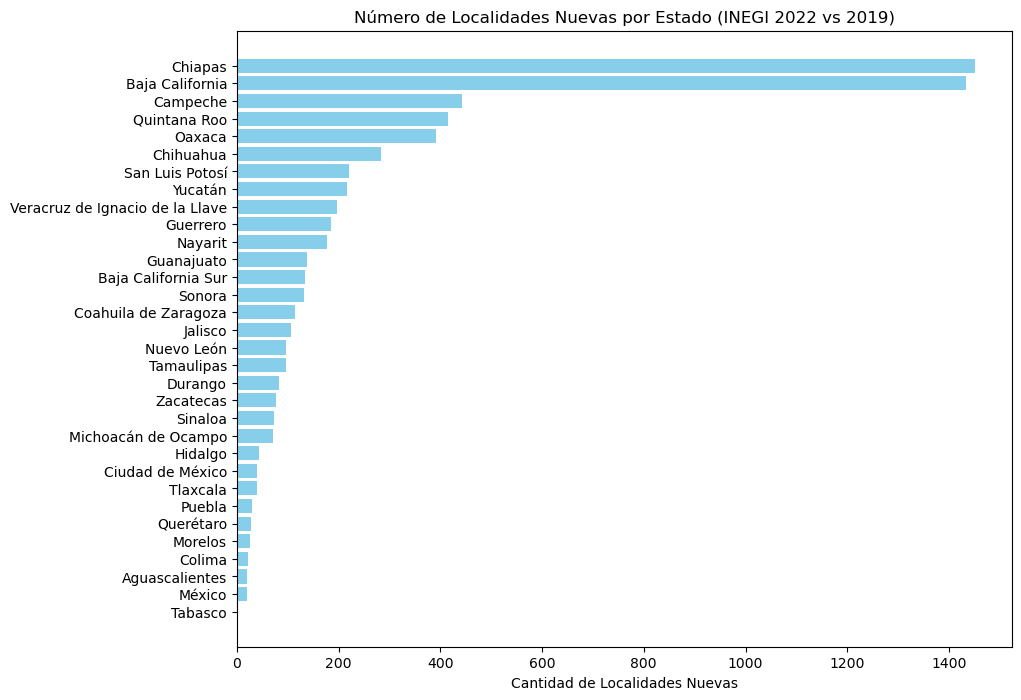

In [16]:
import matplotlib.pyplot as plt

# Ordenar el DataFrame por la cantidad de localidades nuevas de mayor a menor
conteo_por_estado = conteo_por_estado.sort_values(by='Cantidad_Nuevas', ascending=False)

# Crear la gráfica de barras horizontales
plt.figure(figsize=(10, 8))
plt.barh(conteo_por_estado['NOM_ENT'], conteo_por_estado['Cantidad_Nuevas'], color='skyblue')
plt.xlabel('Cantidad de Localidades Nuevas')
plt.title('Número de Localidades Nuevas por Estado (INEGI 2022 vs 2019)')
plt.gca().invert_yaxis()  # Invertir el eje y para ordenar de mayor a menor
plt.show()
